# Introduction

The purpose of this notebook is to check whether we get similar gain patterns from artificially created steps based on perfectly repeatable cyclic walking with random noise added to each measurement. It also gives some idea of how much we are perturbing the person by comparing the variation in the joint angles, rates, and torques in normal walking and perturbed walking.

# Imports

In [1]:
import numpy as np
import pandas
from IPython.core.pylabtools import figsize
from gaitanalysis import gait
from gaitanalysis.controlid import SimpleControlSolver

In [2]:
import sys
sys.path.append('../src')
import utils
from gait_landmark_settings import settings

In [3]:
%matplotlib inline

# Load and Process Data

Load the path to the directory with the experimental data.

In [4]:
trial = utils.Trial('068')

In [5]:
trial.prep_data('First Normal Walking')

Loading pre-cleaned data: /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/cleaned-data/068-first-normal-walking.h5
_write_event_data_frame_to_disk took 0.02 s to execute.
Loading pre-computed inverse dynamics from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-first-normal-walking.h5.
_write_inverse_dynamics_to_disk took 0.06 s to execute.
Loading pre-computed gait cycles from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-first-normal-walking.h5.
_section_into_gait_cycles took 0.06 s to execute.


In [6]:
trial.prep_data('Longitudinal Perturbation')

Loading pre-cleaned data: /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/cleaned-data/068-longitudinal-perturbation.h5
_write_event_data_frame_to_disk took 0.05 s to execute.
Loading pre-computed inverse dynamics from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-longitudinal-perturbation.h5.
_write_inverse_dynamics_to_disk took 0.07 s to execute.
Loading pre-computed gait cycles from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-longitudinal-perturbation.h5.
_section_into_gait_cycles took 0.46 s to execute.


Number of valid normal and perturbed steps.

In [7]:
normal_cycles, _ = trial._remove_bad_gait_cycles('First Normal Walking')
perturbed_cycles, _ = trial._remove_bad_gait_cycles('Longitudinal Perturbation')

In [8]:
num_normal_cycles = normal_cycles.shape[0]
num_normal_cycles

50

In [9]:
num_perturbed_cycles = perturbed_cycles.shape[0]
num_perturbed_cycles

429

# Compare the standard deviation in the measurements

In [10]:
sensors = trial.sensors
controls = trial.controls

Now compute the standard deviation of each signal across steps, to show the variation in the steps.

In [11]:
normal_std = normal_cycles.std(axis='items')[sensors + controls]

In [12]:
perturbed_std = perturbed_cycles.std(axis='items')[sensors + controls]

This table shows the ratio of the standard deviation of the joint angles in perturbed walking and the standard deviation of joint angles in unperturbed walking.

In [13]:
ratio_std_angle = (perturbed_std / normal_std)[[s for s in sensors if s.endswith('Angle')]]
ratio_std_angle

,Right.Ankle.PlantarFlexion.Angle,Right.Knee.Flexion.Angle,Right.Hip.Flexion.Angle,Left.Ankle.PlantarFlexion.Angle,Left.Knee.Flexion.Angle,Left.Hip.Flexion.Angle
0.00,1.597373,2.277965,1.300801,1.968138,1.091553,1.568801
0.05,2.175445,1.544041,1.205864,2.677228,1.271039,1.535661
0.10,1.826545,1.702382,1.350379,2.997943,1.420917,1.213789
0.15,2.085353,1.834058,1.349592,2.638380,1.361478,1.119877
0.20,2.095668,1.560718,1.367509,1.082820,1.267704,1.106284
0.25,1.964675,1.462043,1.529898,1.330997,1.435546,1.115525
0.30,1.796174,1.634562,1.703469,1.258941,1.668291,1.226600
0.35,1.555042,1.784630,1.824853,1.197193,1.522718,1.392344
0.40,1.278950,1.731637,1.831905,1.107816,1.485052,1.303705
0.45,1.237951,1.700301,1.937941,1.131912,1.412362,1.104182


The minimum and maximum values for each angle give and idea of how much the person is being perturbed. We see a max of 2X the normal walking and lows around 1X (i.e. no change).

In [14]:
ratio_std_angle.min()

Right.Ankle.PlantarFlexion.Angle    1.184855
Right.Knee.Flexion.Angle            1.199213
Right.Hip.Flexion.Angle             1.191600
Left.Ankle.PlantarFlexion.Angle     1.082820
Left.Knee.Flexion.Angle             1.091553
Left.Hip.Flexion.Angle              0.918046
dtype: float64

In [15]:
ratio_std_angle.max()

Right.Ankle.PlantarFlexion.Angle    2.175445
Right.Knee.Flexion.Angle            2.277965
Right.Hip.Flexion.Angle             1.937941
Left.Ankle.PlantarFlexion.Angle     2.997943
Left.Knee.Flexion.Angle             2.000827
Left.Hip.Flexion.Angle              1.962373
dtype: float64

We can also look at the rates.

In [16]:
ratio_std_rate = (perturbed_std / normal_std)[[s for s in sensors if s.endswith('Rate')]]
ratio_std_rate.min()

Right.Ankle.PlantarFlexion.Rate    1.206120
Right.Knee.Flexion.Rate            1.184475
Right.Hip.Flexion.Rate             1.160786
Left.Ankle.PlantarFlexion.Rate     1.160147
Left.Knee.Flexion.Rate             1.107142
Left.Hip.Flexion.Rate              1.148357
dtype: float64

In [17]:
ratio_std_rate.max()

Right.Ankle.PlantarFlexion.Rate    2.369716
Right.Knee.Flexion.Rate            2.056739
Right.Hip.Flexion.Rate             1.926082
Left.Ankle.PlantarFlexion.Rate     3.053627
Left.Knee.Flexion.Rate             1.962020
Left.Hip.Flexion.Rate              1.935262
dtype: float64

These also range 1X to 2X.

In [18]:
ratio_std_torque = (perturbed_std / normal_std)[controls]
ratio_std_torque.min()

Right.Ankle.PlantarFlexion.Moment    1.570722
Right.Knee.Flexion.Moment            1.304760
Right.Hip.Flexion.Moment             1.341341
Left.Ankle.PlantarFlexion.Moment     1.144597
Left.Knee.Flexion.Moment             1.045105
Left.Hip.Flexion.Moment              1.180167
dtype: float64

In [19]:
ratio_std_torque.max()

Right.Ankle.PlantarFlexion.Moment    2.488364
Right.Knee.Flexion.Moment            2.436606
Right.Hip.Flexion.Moment             2.892812
Left.Ankle.PlantarFlexion.Moment     2.755447
Left.Knee.Flexion.Moment             2.391390
Left.Hip.Flexion.Moment              2.099359
dtype: float64

The torques have higher max values, some close to 3X. The min is still around 1X.

Samin gave me some similar numbers from here results from the 2-link inverted pendulum balancing problem.

In [20]:
standing_std_no_external_perturbation = pandas.DataFrame({'Ankle.Angle': [0.0043],
                                                          'Ankle.Rate': [0.0122],
                                                          'Hip.Angle': [0.0102],
                                                          'Hip.Rate': [0.0405],
                                                          'Ankle.Torque': [50.11],
                                                          'Hip.Torque': [50.04]})

In [21]:
standing_std_min_external_perturbation = pandas.DataFrame({'Ankle.Angle': [0.0107],
                                                           'Ankle.Rate': [0.0513],
                                                           'Hip.Angle': [0.0157],
                                                           'Hip.Rate': [0.0501],
                                                           'Ankle.Torque': [54.42],
                                                           'Hip.Torque': [50.15]})

In [22]:
standing_std_better_external_perturbation = pandas.DataFrame({'Ankle.Angle': [0.0105],
                                                              'Ankle.Rate': [0.0277],
                                                              'Hip.Angle': [0.0118],
                                                              'Hip.Rate': [0.093],
                                                              'Ankle.Torque': [51.228],
                                                              'Hip.Torque': [50.07]})

So at the bare minimum perturbation for reasonable control id with the direct method, these are the ratios of the standard deviations:

In [23]:
standing_std_min_external_perturbation / standing_std_no_external_perturbation

,Ankle.Angle,Ankle.Rate,Ankle.Torque,Hip.Angle,Hip.Rate,Hip.Torque
0,2.488372,4.204918,1.086011,1.539216,1.237037,1.002198


So, we seem to have enough perturbations in the walking ID for some of the angles. The minimum perturbations in the walking are all a bit lower than these numbers, with the ankle angle and rate being the poorest.

We can visualize how variable the steps are too.

In [24]:
figsize(14, 14)

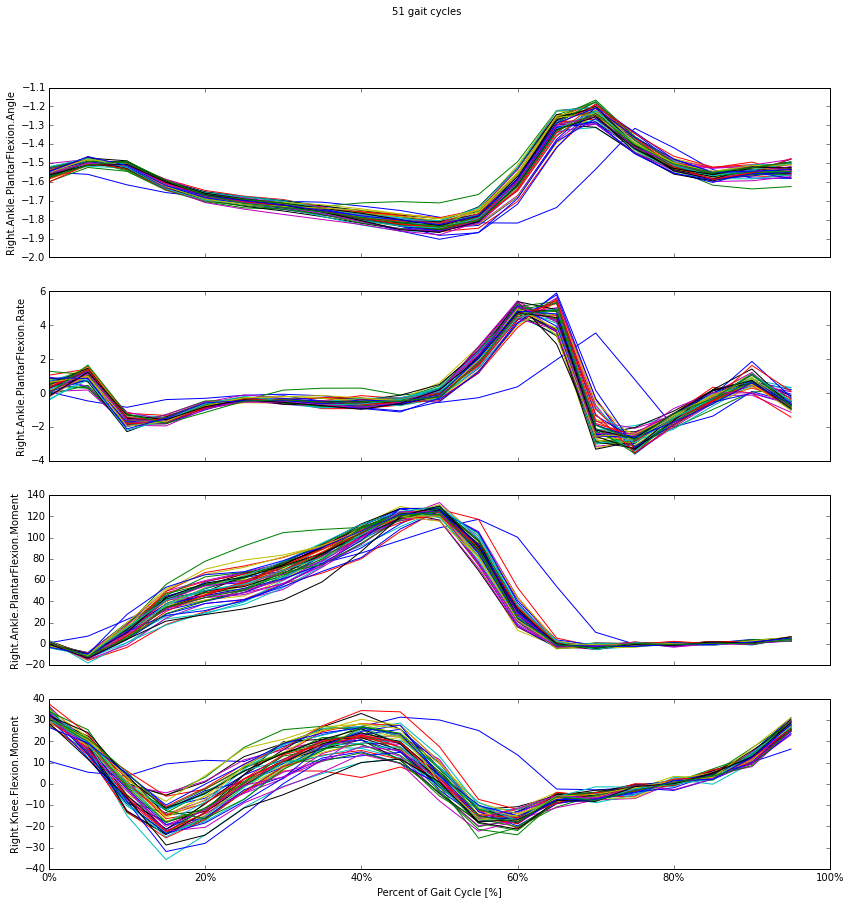

In [25]:
axes = trial.gait_data_objs['First Normal Walking'].plot_gait_cycles(
    *(sensors[:2] + controls[:2]), mean=False)

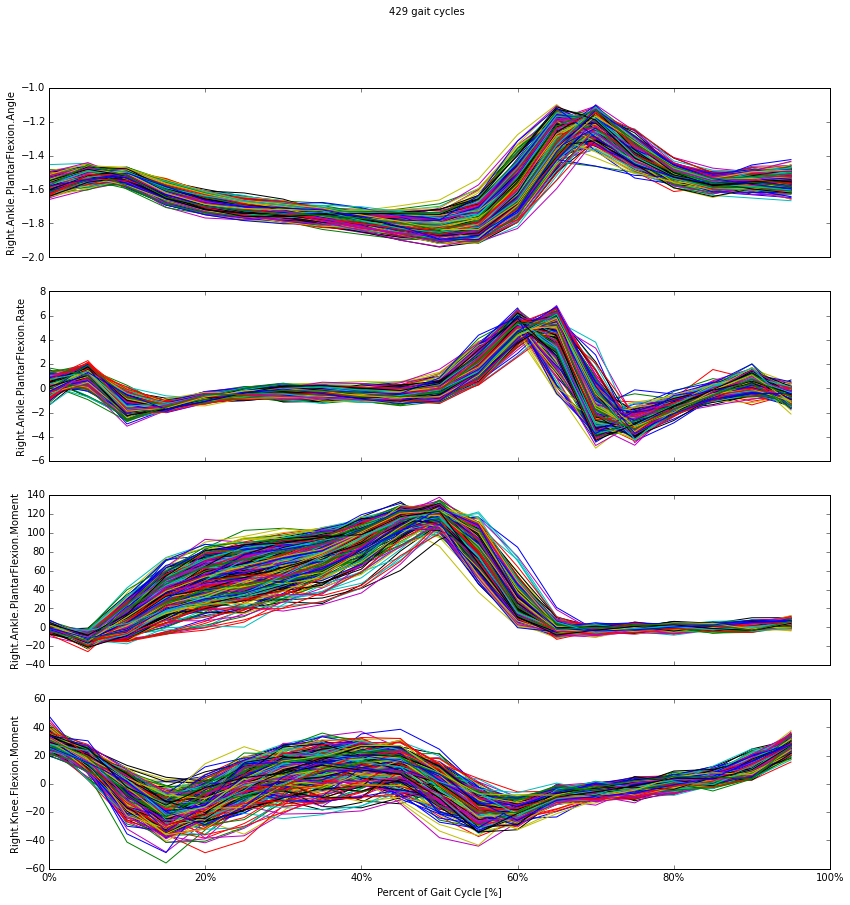

In [26]:
axes = trial.gait_data_objs['Longitudinal Perturbation'].plot_gait_cycles(
    *(sensors[:2] + controls[:2]), mean=False)

# Create Artificial Steps

Now we will select one of the steps and build a panel of steps that based on that single step and add random noise to the columns for the sensors and controls.

In [27]:
def create_artificial_steps(base_step_number):
    step_data_frames = []
    for i in range(num_normal_cycles):
        # pick the 20th step
        df = normal_cycles.iloc[base_step_number].copy()
        for col in sensors + controls:
            # normal() doesn't say that you can pass in an array for the scale but I think it works by broadcasting.
            df[col] = df[col] + np.random.normal(0.0, perturbed_std[col].values, (len(df),))
        step_data_frames.append(df)
    artificial_steps = pandas.Panel(dict(zip(range(len(step_data_frames)), step_data_frames)))
    return artificial_steps

In [28]:
artificial_steps = create_artificial_steps(20)

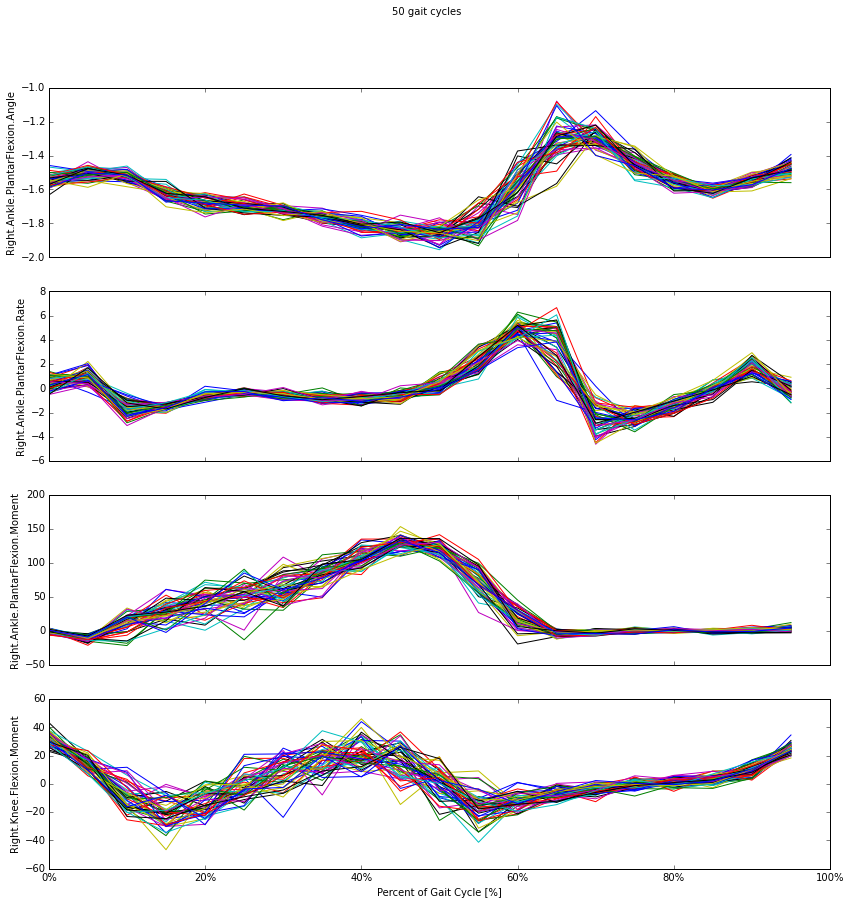

In [29]:
axes = gait.plot_gait_cycles(artificial_steps, *(sensors[:2] + controls[:2]))

# Gains identified from normal walking

In [30]:
trial.identify_controller('First Normal Walking', 'joint isolated')

Loading pre-cleaned data: /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/cleaned-data/068-first-normal-walking.h5
_write_event_data_frame_to_disk took 0.02 s to execute.
Loading pre-computed inverse dynamics from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-first-normal-walking.h5.
_write_inverse_dynamics_to_disk took 0.03 s to execute.
Loading pre-computed gait cycles from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-first-normal-walking.h5.
_section_into_gait_cycles took 0.04 s to execute.
Loading pre-computed gains from:
    /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gains/joint-isolated/068-first-normal-walking.npz
    /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gains/joint-isolated/068-first-normal-walking.h5
identify_controller took 0.35 s to execute.


In [31]:
figsize(10, 8)

Generating gain plot.
plot_joint_isolated_gains took 1.06 s to execute.


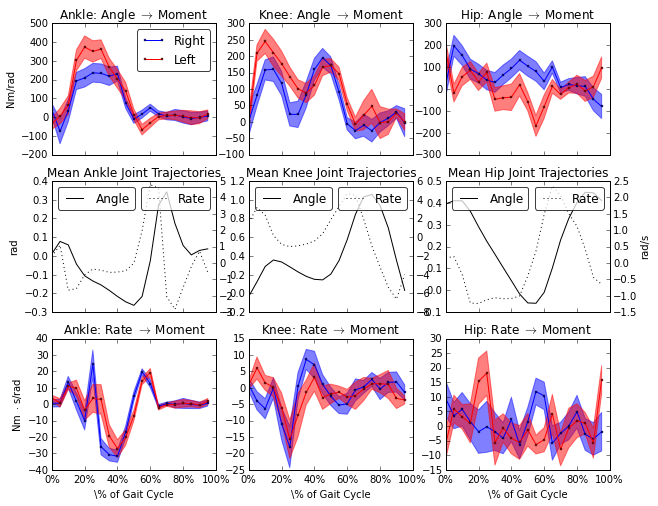

In [32]:
fig, axes = trial.plot_joint_isolated_gains('First Normal Walking', 'joint isolated')

# Gains identified from perturbed walking

In [33]:
trial.identify_controller('Longitudinal Perturbation', 'joint isolated')

Loading pre-cleaned data: /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/cleaned-data/068-longitudinal-perturbation.h5
_write_event_data_frame_to_disk took 0.05 s to execute.
Loading pre-computed inverse dynamics from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-longitudinal-perturbation.h5.
_write_inverse_dynamics_to_disk took 0.10 s to execute.
Loading pre-computed gait cycles from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-longitudinal-perturbation.h5.
_section_into_gait_cycles took 0.09 s to execute.
Loading pre-computed gains from:
    /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gains/joint-isolated/068-longitudinal-perturbation.npz
    /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gains/joint-isolated/068-longitudinal-perturbation.h5
identify_controller took 0.30 s to execute.


Generating gain plot.
plot_joint_isolated_gains took 1.15 s to execute.


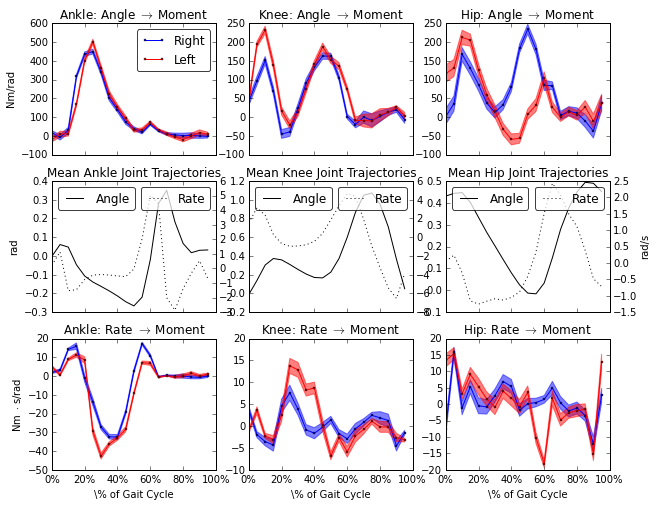

In [34]:
fig, axes = trial.plot_joint_isolated_gains('Longitudinal Perturbation', 'joint isolated')

# Gains Identified from Artificial Steps

In [35]:
solver = SimpleControlSolver(create_artificial_steps(20), sensors, controls)

In [36]:
gain_inclusion_matrix = np.zeros((len(controls), len(sensors))).astype(bool)
for i, row in enumerate(gain_inclusion_matrix):
    row[2 * i:2 * i + 2] = True

In [37]:
artificial_result = solver.solve(gain_inclusion_matrix=gain_inclusion_matrix)

Generating gain plot.
0.33 s


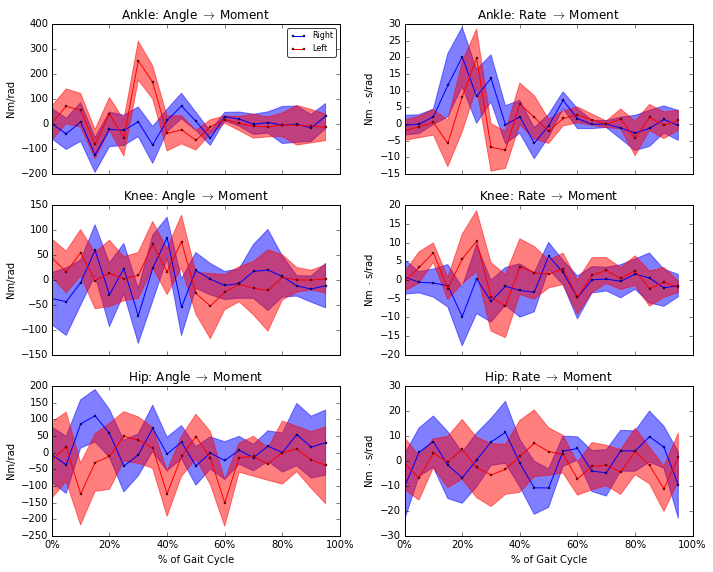

In [38]:
fig, axes = utils.plot_joint_isolated_gains(trial.sensors, trial.controls,
                                            artificial_result[0], artificial_result[3])

Solve for the gains from the same base step but with different noise applied to ensure we get different results than the first.

In [39]:
solver = SimpleControlSolver(create_artificial_steps(20), sensors, controls)

In [40]:
artificial_result = solver.solve(gain_inclusion_matrix=gain_inclusion_matrix)

Generating gain plot.
0.53 s


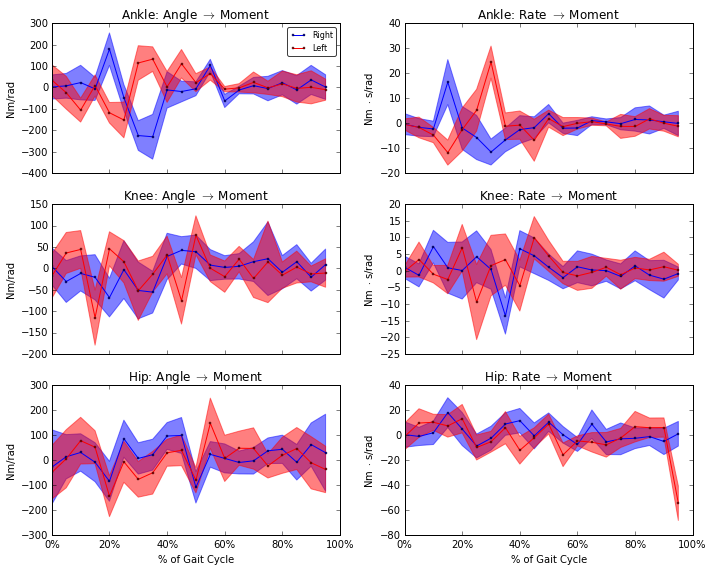

In [41]:
fig, axes = utils.plot_joint_isolated_gains(trial.sensors, trial.controls,
                                            artificial_result[0], artificial_result[3])

So this is good news. We are not able to identifying the same gains from this artificial data. And the gains have no apparent, repeatable patterns. It also seems to give gains of zero, which is what you may expect from this atificial data.

# Conclusion

This seems to to show that the gain patterns we get from the real data, both normal walking and perturbed walking, are not some artifact of the nominal cyclic motion and the mathematical method. It may be the case that walking without the longitudinal perturbations is still internally perturbed enough for us to extract some reasonable gains for the controller. This also indicates that the recoveries from perturbations are likely not random, because we would not see the repeatable results in the controller identification.

# Footer

In [42]:
!git rev-parse HEAD

a19dc801dfe212213ff0d1c56993f6297b527797


In [43]:
!git --git-dir=/home/moorepants/src/GaitAnalysisToolKit/.git --work-tree=/home/moorepants/src/GaitAnalysisToolKit rev-parse HEAD

9e80dfdcfe0a14b44e0ebcbadb6e9e827d215c3c


In [44]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

Installed version_information.py. To use it, type:
  %load_ext version_information


In [45]:
%load_ext version_information

In [46]:
%version_information numpy, scipy, pandas, matplotlib, tables, oct2py, dtk, gaitanalysis

Software,Version
Python,2.7.9 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython,3.0.0
OS,Linux 3.13.0 49 generic x86_64 with debian jessie sid
numpy,1.9.2
scipy,0.15.1
pandas,0.16.0
matplotlib,1.4.2
tables,3.1.1
oct2py,3.1.0
dtk,0.4.0


In [47]:
!conda list

# packages in environment at /home/moorepants/anaconda/envs/gait-direct-id-paper:
#
backports.ssl-match-hostname 3.4.0.2                   <pip>
cairo                     1.12.18                       0  
dateutil                  2.4.1                    py27_0  
dynamicisttoolkit         0.4.0                    py27_0  
fastcache                 1.0.2                    py27_0  
fontconfig                2.11.1                        2  
freetype                  2.4.10                        0  
gaitanalysistoolkit (/home/moorepants/src/GaitAnalysisToolKit) 0.2.0.dev0                <pip>
hdf5                      1.8.14                        0  
ipython                   3.0.0                    py27_0  
ipython-notebook          3.0.0                    py27_1  
jinja2                    2.7.3                    py27_1  
jsonschema                2.4.0                    py27_0  
libpng                    1.5.13                        1  
libsodium                 0.4.5         

In [48]:
!pip freeze

backports.ssl-match-hostname==3.4.0.2
DynamicistToolKit==0.4.0
fastcache==1.0.2
-e git+git@github.com:csu-hmc/GaitAnalysisToolKit.git@9e80dfdcfe0a14b44e0ebcbadb6e9e827d215c3c#egg=GaitAnalysisToolKit-origin_speedup-inverse-dynamics
ipython==3.0.0
Jinja2==2.7.3
jsonschema==2.4.0
MarkupSafe==0.23
matplotlib==1.4.2
mistune==0.5.1
nose==1.3.4
numexpr==2.3.1
numpy==1.9.2
oct2py==3.1.0
pandas==0.16.0
ptyprocess==0.4
Pygments==2.0.2
pyparsing==2.0.1
PySide==1.2.1
python-dateutil==2.4.2
pytz==2015.2
PyYAML==3.11
pyzmq==14.5.0
scipy==0.15.1
seaborn==0.5.1
six==1.9.0
snakeviz==0.3.1
sympy==0.7.6
tables==3.1.1
terminado==0.5
tornado==4.1
